# Лабораторная работа 3

Выполнила студентка группы БВТ2101 Пьянова Анна

### Задание на работу с Z-оценкой

1.	Загрузите датасет eng_test.csv. Обратите внимание на сепаратор (sep=';'). Выведите первые 5 элементов

In [2]:
import pandas as pd

data = pd.read_csv('./data/eng_test.csv', sep=';')
data.head(10)

,Id,Exam,Score,Advanced
0,ID1,TOEFL,77.0,NO
1,ID10,TOEFL,105.0,NO
2,ID100,TOEFL,107.0,YES
3,ID101,TOEFL,72.0,NO
4,ID102,TOEFL,120.0,YES
5,ID103,TOEFL,84.0,YES
6,ID104,TOEFL,105.0,YES
7,ID105,TOEFL,93.0,YES
8,ID106,TOEFL,80.0,YES
9,ID107,TOEFL,95.0,NO


2.	Постойте гистограмму по оценкам студентов

Text(0.5, 1.0, 'Histogram of students score')

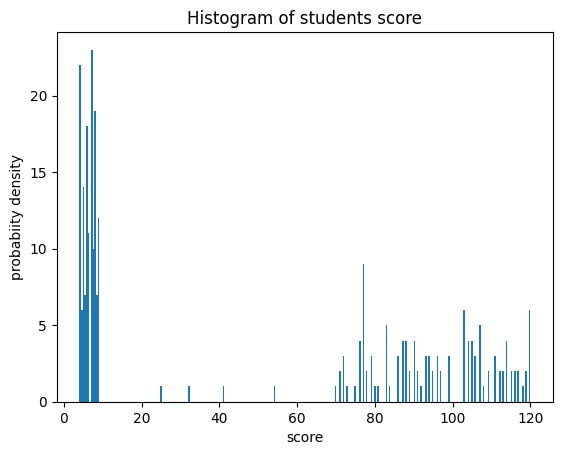

In [2]:
import matplotlib.pyplot as plt

score = data['Score']

fig, ax = plt.subplots(1, 1)
ax.hist(score, bins=len(data))
ax.set_xlabel('score')
ax.set_ylabel('probabiity density')
ax.set_title('Histogram of students score')

3.	Создайте переменную, содержащую информацию только об оценках TOEFL и выведите гистограмму и основные статистики

Text(0.5, 1.0, 'Histogram of students TOEFL score')

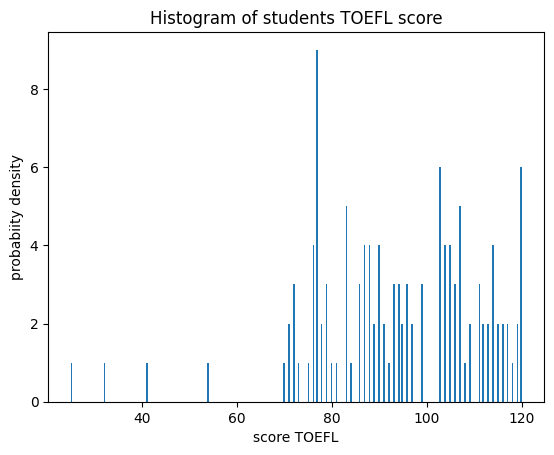

In [3]:
score_TOEFL = data[data['Exam'] == 'TOEFL']['Score']

fig, ax = plt.subplots(1, 1)
ax.hist(score_TOEFL, bins=len(data))
ax.set_xlabel('score TOEFL')
ax.set_ylabel('probabiity density')
ax.set_title('Histogram of students TOEFL score')

In [13]:
print("Median of TOEFL score: ", round(score_TOEFL.median(), 2))
print("Standard deviation of TOEFL score: ", round(score_TOEFL.std(), 2))
print("Mean of TOEFL score: ", round(score_TOEFL.mean(), 2))
score_TOEFL.describe()

Median of TOEFL score:  94.0
Standard deviation of TOEFL score:  17.9
Mean of TOEFL score:  93.78


count    125.000000
mean      93.776000
std       17.903804
min       25.000000
25%       81.000000
50%       94.000000
75%      107.000000
max      120.000000
Name: Score, dtype: float64

4.	Создайте переменную, содержащую информацию только об оценках IELTS и выведите гисограмму и основные статистики

Text(0.5, 1.0, 'Histogram of students IELTS score')

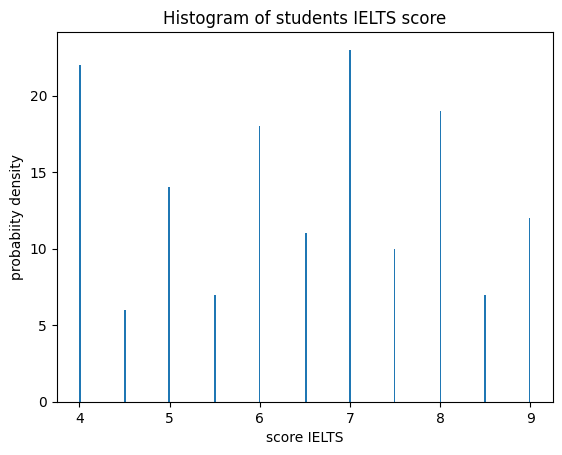

In [15]:
score_IELTS = data[data['Exam'] == 'IELTS']['Score']

fig, ax = plt.subplots(1, 1)
ax.hist(score_IELTS, bins=len(data))
ax.set_xlabel('score IELTS')
ax.set_ylabel('probabiity density')
ax.set_title('Histogram of students IELTS score')

In [12]:
print("Median of IELTS score: ", round(score_IELTS.median(), 2))
print("Standard deviation of IELTS score: ", round(score_IELTS.std(), 2))
print("Mean of IELTS score: ", round(score_IELTS.mean(), 2))
score_IELTS.describe()

Median of IELTS score:  6.5
Standard deviation of IELTS score:  1.57
Mean of IELTS score:  6.43


count    149.000000
mean       6.432886
std        1.571126
min        4.000000
25%        5.000000
50%        6.500000
75%        8.000000
max        9.000000
Name: Score, dtype: float64

5.	Посчитайте z-score для первого студента в списке toefl. Также выведите стандартное отклонение, среднее и само кол-во баллов

In [7]:
def z_score(df):
    return (round((df - df.mean())/df.std(), 2))

In [8]:
print("Z-score for 1-st TOEFL student: ", z_score(score_TOEFL)[0])
print("Standard deviation of TOEFL score: ", round(score_TOEFL.std(), 2))
print("Mean of TOEFL score: ", round(score_TOEFL.mean(), 2))
print("Score of 1-st TOEFL student: ", score_TOEFL[0])

Z-score for 1-st TOEFL student:  -0.94
Standard deviation of TOEFL score:  17.9
Mean of TOEFL score:  93.78
Score of 1-st TOEFL student:  77.0


6.	Сохраните в переменные Z-score для ielts и toefl

In [9]:
zscore_toelf = z_score(score_TOEFL)
zscore_ielts = z_score(score_IELTS)

### Задание на работу с выбросами

In [28]:
bikes = pd.read_pickle('data/BikesDataVars.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


1.	Найдите интерквартильный размах по атрибуту 'Rental Count'.

<AxesSubplot: xlabel='Rental Count'>

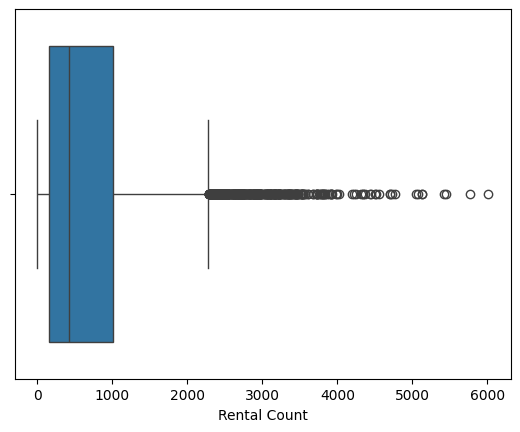

In [5]:
import seaborn as sns

sns.boxplot(bikes['Rental Count'], orient='h')

In [6]:
q1 = bikes['Rental Count'].quantile(0.25)
q3 = bikes['Rental Count'].quantile(0.75)
iqr = q3 - q1
print("Interquartile range of Rental Count: ", iqr)

Interquartile range of Rental Count:  852.0


2. Выведите значения q1 - 1.5 * iqr, q1 + 1.5 * iqr

In [7]:
print("q1 - 1,5*iqr = ", q1 - 1.5*iqr)
print("q3 + 1,5*iqr = ", q3 + 1.5*iqr)

q1 - 1,5*iqr =  -1121.0
q3 + 1,5*iqr =  2287.0


3.	Определите, в какие часы какое количество выбросов было зафиксировано. (value_counts)

In [20]:
outliers = bikes[(bikes['Rental Count'] < (bikes['Rental Count'].quantile(0.25) - 
                                          1.5 * (bikes['Rental Count'].quantile(0.75) - bikes['Rental Count'].quantile(0.25)))) | 
                                          (bikes['Rental Count'] > (bikes['Rental Count'].quantile(0.75) + 
                                                                    1.5 * (bikes['Rental Count'].quantile(0.75) - bikes['Rental Count'].quantile(0.25))))]
print("Outliers (Rental Count) by Hour\n", outliers.groupby('Hour', as_index=False)['Hour'].value_counts())

Outliers (Rental Count) by Hour
     Hour  count
0      7      4
1      8     38
2      9      1
3     13      7
4     14      8
5     15     10
6     16     23
7     17     51
8     18     95
9     19     64
10    20     48
11    21     39
12    22     21
13    23      4


4.	Выведите количество выбросов по сезонам

In [21]:
print("Outliers (Rental Count) by Seasons\n", outliers.groupby('Seasons', as_index=False)['Seasons'].value_counts())

Outliers (Rental Count) by Seasons
   Seasons  count
0  Autumn    116
1  Spring    101
2  Summer    196


5.	Выведите среднее, среднеквадратичное отклонение и пороги для атрибута Rental Count (+- 2.5 стандартных отклонений).

In [4]:
mean = bikes['Rental Count'].mean()

std_dev = bikes['Rental Count'].std()

lower_threshold = mean - 2.5 * std_dev
upper_threshold = mean + 2.5 * std_dev

print("Mean of Rental Count: ", round(mean, 2))
print("Standard deviation of Rental Count: ", round(std_dev, 2))
print("Lower Threshold of Rental Count: ", round(lower_threshold, 2))
print("Upper Threshold of Rental Count: ", round(upper_threshold, 2))

Mean of Rental Count:  696.58
Standard deviation of Rental Count:  749.81
Lower Threshold of Rental Count:  -1177.95
Upper Threshold of Rental Count:  2571.11


6.	Определите количество выбросов по данной метрике (с shape)

In [5]:
outliers = bikes[(bikes['Rental Count'] < lower_threshold) | (bikes['Rental Count'] > upper_threshold)]
print("Count of outliers: ", outliers.shape[0])

Count of outliers:  278


7.	Выведите количество выбросов по сезонам.

In [6]:
print("Outliers (Rental Count) by Seasons\n", outliers.groupby('Seasons', as_index=False)['Seasons'].value_counts())

Outliers (Rental Count) by Seasons
   Seasons  count
0  Autumn     75
1  Spring     67
2  Summer    136


### Задание на работу с пропущенными значениями

1.	Посчитайте количество пустых ячеек (isna())

In [29]:
bikes.isna().sum()

Date                      0
Hour                      0
Temperature             179
Humidity                  0
Wind speed                0
Rainfall                  0
Snowfall                  0
Seasons                   0
Holiday                   0
Functioning Day           0
Rental Count              0
Normal Humidity           0
Temperature Category    179
Good Weather              0
dtype: int64

2.	Посчитайте количество заполненных ячеек (notna())

In [30]:
bikes.notna().sum()

Date                    8760
Hour                    8760
Temperature             8581
Humidity                8760
Wind speed              8760
Rainfall                8760
Snowfall                8760
Seasons                 8760
Holiday                 8760
Functioning Day         8760
Rental Count            8760
Normal Humidity         8760
Temperature Category    8581
Good Weather            8760
dtype: int64

3.	Создайте новый датафрэйм bikes1. Скопируйте туда старый. Заполните пустые ячейки числом 42.

In [31]:
bikes1 = bikes.copy()
bikes1['Temperature'] = bikes1['Temperature'].fillna(42)
bikes1.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


4.	Заполните пустые ячейки в bikes медианой. (но сохраняем в другую колонку)

In [32]:
bikes['Temperature Mean'] = bikes['Temperature'].fillna(bikes['Temperature'].mean())
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature Mean
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0,-5.2
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0,-5.5
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0,-6.0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0,-6.2
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0,-6.0


5. Создайте новую колонку 'Temperature_Random', заполните пустые значения из Temperature, сохранив новые значчения в Temperature_Random. Значения возьмите из temps

In [33]:
import numpy as np

temps = np.random.choice(bikes['Temperature'].dropna(), 8760)

bikes['Temperature Random'] = bikes['Temperature'].fillna(pd.Series(temps))
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature Mean,Temperature Random
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0,-5.2,-5.2
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0,-5.5,-5.5
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0,-6.0,-6.0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0,-6.2,-6.2
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0,-6.0,-6.0


6.	Теперь заполните пробелы в Temperature.

In [34]:
bikes['Temperature'] = bikes['Temperature'].fillna(pd.Series(temps))
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature Mean,Temperature Random
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0,-5.2,-5.2
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0,-5.5,-5.5
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0,-6.0,-6.0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0,-6.2,-6.2
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0,-6.0,-6.0


### Задание на работу с корреляцией

1.	Загрузите набор данных с помощью команды

In [36]:
bikes = pd.read_pickle('data/BikesDataImputed.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


2.	Подготовим данные, возьмём аггрегированные по неделям значения температуры и количества аренд велосипедов. Посмотрим, насколько спрос зависит от погоды

In [37]:
temp_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Temperature'].mean()
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()

3.	Сведём переменные в одну таблицу с помощью функции concat. (axis=1 служит для разделения на колонки)

In [41]:
bikes_week = pd.concat([temp_mean, bikes_sum], axis=1)
bikes_week.head(10)

,Temperature,Rental Count
week,,
1,-2.694940,39441
2,-5.079762,30871
3,2.662500,42193
4,-10.038690,23079
5,-5.650595,28415
6,-5.486310,33259
7,-1.225298,32139
8,1.631548,50136
9,4.004167,52958


4.	Возьмём 5 первых значений датафрейма с помощью функции iloc

In [73]:
first_five = bikes_week.iloc[:5]
first_five

,Temperature,Rental Count
week,,
1,-2.694940,39441
2,-5.079762,30871
3,2.662500,42193
4,-10.038690,23079
5,-5.650595,28415


5.	Вычислим X - Mx и Y - My. Температура - X, аренда – Y

In [75]:
for_corr = first_five.copy()
for_corr['X - Mx'] = for_corr['Temperature'] - for_corr['Temperature'].mean()
for_corr['Y - My'] = for_corr['Rental Count'] - for_corr['Rental Count'].mean()
for_corr

,Temperature,Rental Count,X - Mx,Y - My
week,,,,
1,-2.694940,39441,1.465357,6641.2
2,-5.079762,30871,-0.919464,-1928.8
3,2.662500,42193,6.822798,9393.2
4,-10.038690,23079,-5.878393,-9720.8
5,-5.650595,28415,-1.490298,-4384.8


6.	Найдём сумму квадратов для X и Y, а также сумму произведений

In [76]:
sum_xy = (for_corr['X - Mx'] * for_corr['Y - My']).sum()
sum_x2 = (for_corr['X - Mx']**2).sum()
sum_y2 = (for_corr['Y - My']**2).sum()

7.	Найдём коэффициент корреляции

In [77]:
r = sum_xy / (sum_x2 * sum_y2)**0.5
print("The Pearson correlation coefficient r = ", r)

The Pearson correlation coefficient r =  0.9484760874616524


8.	Проверим значение с помощью функции corr для first_five

In [78]:
first_five.corr()

,Temperature,Rental Count
Temperature,1.000000,0.948476
Rental Count,0.948476,1.000000


9.	Теперь найдём корреляцию не для 5 элементов, а для всей генеральной совокупности (bikes_week)

In [79]:
bikes_week.corr()

,Temperature,Rental Count
Temperature,1.000000,0.845808
Rental Count,0.845808,1.000000


10. Построим график вида scatter (график рассеивания) по Temperature и Rental Count в bikes_week

Text(0.5, 1.0, 'Scatter plot')

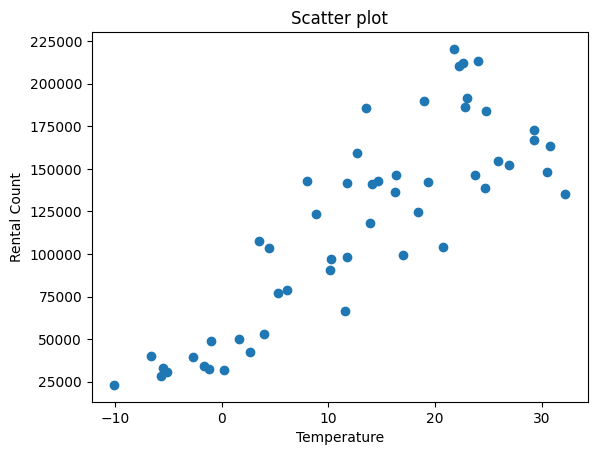

In [82]:
import matplotlib.pyplot as plt

plt.scatter(bikes_week['Temperature'], bikes_week['Rental Count'])
plt.xlabel('Temperature')
plt.ylabel('Rental Count')
plt.title('Scatter plot')